# *k*-Means Clustering

ลองข้อมูลน้ำพุร้อน Old Faithful http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

![Old Faithful Greyser](images/wyoming-old-faithful.jpg "Old Faithful Greyser")
<div style="text-align: center;">
Credit: http://www.destination360.com/north-america/us/wyoming/yellowstone-national-park/old-faithful
</div>

In [10]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot
from sklearn import cluster

โหลดข้อมูลจากไฟล์ CSV แล้วเก็บข้อมูลฟอร์แมตของ Numpy อาเรย์

In [11]:
data = []
with open('data/old_faithful_greyser_data.csv', 'rb') as csvfile:
    _ = csvfile.next()
    for line in csvfile:
        eruption_time, waiting_time = line.split(',')
        data.append([float(eruption_time), float(waiting_time)])

data = np.array(data)

ลองพล็อตข้อมูล

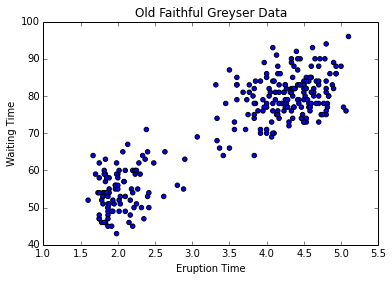

In [12]:
for eruption_time, waiting_time in data:
    pyplot.scatter(eruption_time, waiting_time)

pyplot.title('Old Faithful Greyser Data')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()

จากพล็อตเราจะเห็นได้ว่าข้อมูลสามารถแบ่งได้เป็น 2 กลุ่มหลักๆ ดังนั้นเราจะลองใช้ค่า `k = 2` สำหรับโมเดล *k*-means

In [13]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

หลังจากโมเดลเสร็จ เราสามารถดูค่าจุดศูนย์กลางของข้อมูลแต่ละกลุ่มได้ดังนี้

In [14]:
centroids = kmeans.cluster_centers_

print centroids

[[  2.09433     54.75      ]
 [  4.29793023  80.28488372]]


และสามารถดู label ของข้อมูลที่เรานำเข้าได้ ว่าโมเดล *k*-means ที่เราสร้างขึ้นจัดข้อมูลแต่ละข้อมูลให้อยู่ label ไหนบ้าง

In [15]:
labels = kmeans.predict(data)

print labels

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


จากนั้นเราสามารถนำข้อมูล label เหล่านั้นมาพล็อตดูผลลัพธ์ได้ดังนี้

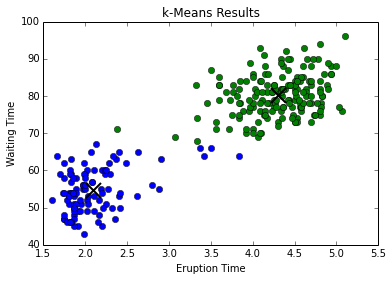

In [16]:
for each in xrange(k):
    selected_data = data[np.where(labels==each)]
    pyplot.plot(selected_data[:, 0], selected_data[:, 1], 'o')
    lines = pyplot.plot(centroids[each, 0], centroids[each, 1], 'kx')
    pyplot.setp(lines, markersize=15.0, markeredgewidth=2.0)

pyplot.title('k-Means Results')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()